<img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 1 - Basic Techniques

**Due:** 3 February, 19h AT

**Your name:** Tasneem Hoque  
**Your Banner ID:** B00841761  
**Your NetID:** ts562346

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | /25     |           |
| 2  | Section 2     |     | /22     |           |
| 3  | Bonus         |     | /5      |           |
| -  | TOTAL         |     | /47     |           |

The main purpose of this assignment is to get familiar with processes of constructing and using a data warehouse. There are two sections: the first focuses on simple data loading and cleaning with simple data, and the second focuses on more complex data. In both cases, we will use publicly available datasets focused in the healthcare domain.

In [1]:
# import any libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from fitter import Fitter, get_common_distributions

# TODO: add any additional libraries here

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

# your code should run in Python3.9

## Section 1 - Data cleaning and ETL

A [Notifiable disease](https://en.wikipedia.org/wiki/Notifiable_disease#Canada) is any disease that, by law, must be reported to government authorities. Aggregating data on these diseases allows the authorities to monitor their development, and provides early warning of possible outbreaks. The [Canadian Notifiable Disease Surveillance System](https://diseases.canada.ca/notifiable/) is a searchable database tool provided by the Public Health Agency of Canada. 

In this Section, we will practice cleaning some small, simple datasets.

### Dataset

The data for this section come from [Nova Scotia's Open Data Portal](https://data.novascotia.ca/) under the [Nova Scotia Open Government Licence](http://novascotia.ca/opendata/licence.asp). Specifically:

1. [Notifiable Diseases Counts and Rates By Zone 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Zone-2014-/36ek-n7n8), and
2. [Notifiable Diseases Counts and Rates By Sex 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Sex-2014-2/hgpa-vixp)

The two files are in the [CSV](https://www.w3schools.com/python/pandas/pandas_csv.asp) file format, with a single header row and the following fields (Zone and Sex only appear in their respective file):

| Field                       | Type      | Description |
|-----------------------------|-----------|-------------|
| Zone                        | Text      | One of four non-overlapping regions, or the aggregate 'Nova Scotia'      |
| Sex                         | Text      | Traditional binary labels, or the aggregate 'All'       |
| Year                        | Int       | The year in the Common Era |
| Disease                     | Text      | The name of the disease. Additional information on the diseases can be found [here](https://novascotia.ca/dhw/cdpc/cdc/). |
| Number of Cases             | Int       | The number of cases in the indicated region, for the indicated year |
| Rate per 100,000 population | Float     | The rate per 100,000 population in the indicated region, for the indicated year |


Public government data are less likely to contain errors that require cleaning or correction, so we have artificially corrupted the data for this assignment using a Python script. Specifically, we have made the following corruptions:

1. **Removal**. We have randomly removed data in individual cells. Fields may be empty, have some indicative label such as 'Null', or some other corruption indicating deletion. To mimic real-world scenarios, we cannot tell you what all of these corruptions may be.
2. **Range errors**. We have given some numeric data impossibly small values.
3. **Spelling**. We have introduced spelling mistakes using the [corrupted-text](https://pypi.org/project/corrupted-text/) library to text fields.
4. **Duplicates**. We have randomly repeated some rows
5. **Shuffle**. We have randomly shuffled rows subsequent to the above corruptions.

### Tasks

Our tasks in this section are to clean the data, perform simple 'sanity checks', and display some simple visualizations. This is essentially a simplified view into an ETL process. You can use the clean data provided directly by the Nova Scotia government at the links above to validate your work, but your code must work assuming you don't have acss to the clean gold standard versions. Also note that we are fortunate that these data have, essentially, error-correcting codes built in, since 'All' data should be the sum of Male and Female data, and 'Nova Scotia' data should be the sum of all the individual regions.

Complete each of the code cells below according to the instructions in the comments.



In [11]:
# 1. load the corrupted data in a Pandas DataFrame. 
#     Note that we will test your code on another corruption of the same dataset, 
#        so you should not hardcode to your version. 
#     Note that you can load your own corruptions for testing, 
#        but you should submit a notebook with our original corruptions.

# Note: you are encouraged to download these files either from here or from Brightspace directly and to use them locally,
#       as long as your code works for the markers (e.g., do not hardcode local paths in submission).
urlSex  = 'https://dal.brightspace.com/d2l/common/viewFile.d2lfile/Database/MTQ0Nzc0MDc/Notifiable_Diseases_Counts_and_Rates_By_Sex_2014-2017.corrupt.csv?ou=250788'
urlZone = 'https://dal.brightspace.com/d2l/common/viewFile.d2lfile/Database/MTQ0Nzc0MDg/Notifiable_Diseases_Counts_and_Rates_By_Zone_2014-2017.corrupt.csv?ou=250788'

# TODO YOUR CODE GOES HERE

sexData = pd.read_csv('Notifiable_Diseases_Counts_and_Rates_By_Sex_2014-2017.corrupt.csv')
zoneData = pd.read_csv('Notifiable_Diseases_Counts_and_Rates_By_Zone_2014-2017.corrupt.csv')

In [12]:
# 2. sort both DataFrames by Year, then by Disease, then by either Zone or Sex. 
#    I.e., all data for 2014 comes before all data from 2015; 
#          within 2014, all data for 'Acquired Immune Deficiency Syndrome' comes before all data for 'Hepatitis B - Acute', 
#          and so on 

# TODO YOUR CODE GOES HERE
sexData.sort_values(by=['Year', 'Disease', 'Sex'], inplace = True) 
zoneData.sort_values(by=['Year', 'Disease', 'Zone'], inplace = True) 


# TODO: print the two sorted Pandas DataFrames
sexData.head(20)
zoneData.head(20)


,Unnamed: 0,Sex,Year,Disease,Number of Cases,"Rate per 100,000 population"
275,275,All,2014.0,Acquired Immune Deficiency Syndrome,2.0,0.2
98,98,Female,2014.0,Acquired Immune Deficiency Syndrome,0.0,0.0
446,446,Male,2014.0,Acquired Immune Deficiency Syndrome,2.0,0.4
215,215,All,2014.0,Acute Flaccid Paralysis,1.0,0.1
492,492,Female,2014.0,Acute Flaccid Paralysis,1.0,0.2
232,232,Male,2014.0,Acute Flaccid Paralysis,0.0,0.0
435,435,All,2014.0,Amebiasis,3.0,0.3
302,302,Female,2014.0,Amebiasis,2.0,0.4
159,159,Male,2014.0,Amebiasis,1.0,0.2
129,129,All,2014.0,Botulism,0.0,0.0


,Unnamed: 0,Zone,Year,Disease,Number of Cases,"Rate per 100,000 population"
500,500,Central,2014.0,Acquired Immune Deficiency Syndrome,1.0,0.2
181,181,Eastern,2014.0,Acquired Immune Deficiency Syndrome,1.0,0.6
195,195,Northern,2014.0,Acquired Immune Deficiency Syndrome,0.0,0.0
128,128,Nova Scotia,2014.0,Acquired Immune Deficiency Syndrome,2.0,0.2
576,576,Nova Scotia,2014.0,Acquired Immune Deficiency Syndrome,2.0,0.2
456,456,Western,2014.0,Acquired Immune Deficiency Syndrome,0.0,0.0
827,827,Central,2014.0,Acute Flaccid Paralysis,0.0,0.0
36,36,Eastern,2014.0,Acute Flaccid Paralysis,0.0,0.0
798,798,Northern,2014.0,Acute Flaccid Paralysis,1.0,0.6
15,15,Nova Scotia,2014.0,Acute Flaccid Paralysis,1.0,0.1


In [13]:
# 3. identify duplicate entries

# TODO YOUR CODE GOES HERE

# TODO: for each DataFrame, print a list of row indices for all duplicates except the first. 
#        E.g., if row 52 is a duplicate of row 51, and row 201 is a duplicate of row 200, 
#              print [52,201]

sexDupIndices = sexData[sexData[['Sex', 'Year', 'Disease', 'Number of Cases', 'Rate per 100,000 population']].duplicated()].index.values
zoneDupIndices = zoneData[zoneData[['Zone', 'Year', 'Disease', 'Number of Cases', 'Rate per 100,000 population']].duplicated()].index.values

sexDupIndices
zoneDupIndices

sexData.drop(sexDupIndices, inplace=True)
zoneData.drop(zoneDupIndices, inplace=True)

# TODO: remove the duplicate rows from the two DataFrames

array([190, 235, 207], dtype=int64)

array([576, 609, 620, 369, 343, 801], dtype=int64)

In [14]:
# 4. identify cells with missing data

# TODO YOUR CODE GOES HERE
# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] are missing or have null-like labels, print [[9,3],[20,1]]

print("\nsex data")

for i in range(sexData.shape[0]): #iterate over rows
    for j in range(sexData.shape[1]): #iterate over columns
        if(pd.isnull(sexData.iloc[i, j])): #get cell value
            sexData.iloc[i, j] = np.nan
            print("[",i,",",j,"],", end="")

print("\nzone data")

for i in range(zoneData.shape[0]): #iterate over rows
    for j in range(zoneData.shape[1]): #iterate over columns
        if(pd.isnull(zoneData.iloc[i, j])): #get cell value = 
            zoneData.iloc[i, j] = np.nan
            print("[",i,",",j,"],", end="")

# TODO: replace these elements with np.nan


sex data
[ 69 , 5 ],[ 92 , 5 ],[ 121 , 5 ],[ 122 , 5 ],[ 154 , 3 ],[ 159 , 5 ],[ 175 , 1 ],[ 180 , 5 ],[ 184 , 1 ],[ 206 , 5 ],[ 236 , 4 ],[ 241 , 5 ],[ 263 , 5 ],[ 296 , 5 ],[ 334 , 1 ],[ 360 , 1 ],[ 415 , 3 ],[ 416 , 3 ],[ 417 , 3 ],[ 418 , 5 ],[ 449 , 1 ],[ 486 , 4 ],[ 513 , 4 ],[ 542 , 3 ],[ 543 , 2 ],[ 544 , 2 ],[ 545 , 2 ],
zone data
[ 9 , 1 ],[ 34 , 5 ],[ 52 , 1 ],[ 57 , 1 ],[ 104 , 5 ],[ 141 , 5 ],[ 187 , 5 ],[ 213 , 1 ],[ 229 , 4 ],[ 243 , 1 ],[ 267 , 4 ],[ 276 , 5 ],[ 322 , 1 ],[ 371 , 1 ],[ 409 , 4 ],[ 459 , 5 ],[ 469 , 3 ],[ 470 , 3 ],[ 504 , 1 ],[ 524 , 5 ],[ 531 , 4 ],[ 568 , 1 ],[ 604 , 5 ],[ 672 , 4 ],[ 685 , 3 ],[ 686 , 3 ],[ 687 , 3 ],[ 709 , 4 ],[ 808 , 1 ],[ 893 , 3 ],[ 894 , 3 ],[ 895 , 2 ],[ 896 , 2 ],[ 897 , 2 ],[ 898 , 2 ],[ 899 , 2 ],[ 900 , 2 ],[ 901 , 2 ],[ 902 , 2 ],[ 903 , 2 ],[ 904 , 2 ],[ 905 , 2 ],[ 906 , 2 ],[ 907 , 2 ],[ 908 , 2 ],

In [18]:
# 5. identify cells with out-of-bounds errors

# TODO YOUR CODE GOES HERE
# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] have out-of-bounds data, print [[9,3],[20,1]]
# TODO: replace these elements with np.nan

# replaced all values above 100 in rates column

print("\nsex data")

ob = sexData.index[(sexData['Rate per 100,000 population'] > 100000) | (sexData['Rate per 100,000 population'] < 0)].tolist()

for x in ob:
  print("[",x,",5]", end="")

sexData.loc[(sexData['Rate per 100,000 population'] > 100000) | (sexData['Rate per 100,000 population'] < 0)]['Rate per 100,000 population'] = np.nan

print("\nzone data")

ob = zoneData.index[(zoneData['Rate per 100,000 population'] > 100000) | (zoneData['Rate per 100,000 population'] < 0)].tolist()

for x in ob:
  print("[",x,",5]", end="")

zoneData.loc[(zoneData['Rate per 100,000 population'] > 100000) | (zoneData['Rate per 100,000 population'] < 0)]['Rate per 100,000 population'] = np.nan


sex data
[ 81 ,5][ 332 ,5]
zone data
[ 876 ,5][ 364 ,5]

C:\Users\Tasne\AppData\Local\Temp\ipykernel_14756\212557514.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexData.loc[(sexData['Rate per 100,000 population'] > 100000) | (sexData['Rate per 100,000 population'] < 0)]['Rate per 100,000 population'] = np.nan
C:\Users\Tasne\AppData\Local\Temp\ipykernel_14756\212557514.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoneData.loc[(zoneData['Rate per 100,000 population'] > 100000) | (zoneData['Rate per 100,000 population'] < 0)]['Rate per 100,000 popul

In [7]:
# 6. perform additional internal 'sanity check' within each data set
#    For each year, the total reported number of each disease (i.e., in the 'All' or 'Nova Scotia' rows)
#    should be the sum of the component parts.

# TODO: make a list of all unique disease names

diseaseNames = sexData['Disease'].unique()
sexData['Sex'] = sexData['Sex'].astype(str)
sexData['Disease'] = sexData['Disease'].astype(str)

for year in range(2014,2018):
    for diseaseName in diseaseNames:
        allRow = sexData[(sexData['Disease']==diseaseName) & (sexData['Sex']=='All') & (sexData['Year']==year)]['Number of Cases'].values
        maleRow = sexData[(sexData['Disease']==diseaseName) & (sexData['Sex']=='Male') & (sexData['Year']==year)]['Number of Cases'].values
        femaleRow = sexData[(sexData['Disease']==diseaseName) & (sexData['Sex']=='Female') & (sexData['Year']==year)]['Number of Cases'].values

        if (allRow.size > 0):
            allRow = allRow[0]
        else:
            allRow = 0
            
        if (maleRow.size > 0):
            maleRow = maleRow[0]
        else:
            maleRow = 0
        
        if (femaleRow.size > 0):
            femaleRow = femaleRow[0]
        else:
            femaleRow = 0
        
        if (allRow != maleRow + femaleRow):
            print( year , ' ' , diseaseName , ' does not sum correctly for sex!')
           

diseaseNames = zoneData['Disease'].unique()

for year in range(2014,2018):
    for diseaseName in diseaseNames:
            central = zoneData[(zoneData['Disease']==diseaseName) & (zoneData['Zone']=='Central') & (zoneData['Year']==year)]['Number of Cases'].values
            eastern = zoneData[(zoneData['Disease']==diseaseName) & (zoneData['Zone']=='Eastern') & (zoneData['Year']==year)]['Number of Cases'].values
            northern = zoneData[(zoneData['Disease']==diseaseName) & (zoneData['Zone']=='Northern') & (zoneData['Year']==year)]['Number of Cases'].values
            western = zoneData[(zoneData['Disease']==diseaseName) & (zoneData['Zone']=='Western') & (zoneData['Year']==year)]['Number of Cases'].values
            ns = zoneData[(zoneData['Disease']==diseaseName) & (zoneData['Zone']=='Nova Scotia') & (zoneData['Year']==year)]['Number of Cases'].values
            
            if (central.size > 0):
                central = central[0]
            else:
                central = 0
            if(eastern.size > 0):
                eastern = eastern[0]
            else:
                eastern = 0
            if(northern.size > 0):
                northern = northern[0]
            else:
                northern = 0
            if(western.size > 0):
                western = western[0]
            else:
                western = 0
            if(ns.size > 0):
                ns = ns[0]
            else:
                ns = 0
            
            if (ns != central + eastern + northern + western):
                    print( year , ' ' , diseaseName , ' does not sum correctly for zone!')

# TODO: your code goes here

# for year in range(2014,2018):
#     for dataType in ['Sex', 'Zone']:
#         for diseaseName in diseaseNames:
            
#             # TODO: if the reported total number of cases is not the same as the sums of the component parts 
#             #       (e.g., if the reported 'All' is not the sum of the male and female cases), then
#             print( year , ' ' , diseaseName , ' does not sum correctly for ', dataType ,'!')
        

2014   Chlamydia  does not sum correctly for sex!
2014   Pertussis  does not sum correctly for sex!
2015   Chlamydia  does not sum correctly for sex!
2015   Giardiasis  does not sum correctly for sex!
2015   Human Immunodeficiency Virus  does not sum correctly for sex!
2015   Influenza  does not sum correctly for sex!
2015   Meningococcal Disease Invasive  does not sum correctly for sex!
2016   Chlamydia  does not sum correctly for sex!
2016   Giardiasis  does not sum correctly for sex!
2016   Group A Streptococcal Disease Invasive -> non-Severe  does not sum correctly for sex!
2016   Hepatitis B - Acute  does not sum correctly for sex!
2016   Human Immunodeficiency Virus  does not sum correctly for sex!
2016   Malaria  does not sum correctly for sex!
2016   Grodp A Styeptococcal Diseake Invaoive -x nou - Sevede  does not sum correctly for sex!
2017   Chlamydia  does not sum correctly for sex!
2017   Gonorrhea  does not sum correctly for sex!
2017   Group B Streptococcal Disease of the

In [8]:
# 7. perform additional external 'sanity check' across both data sets
#    For each year, the total number of each disease should be the same in each dataset 
#    (i.e., the 'All' Sex rows should match the 'Nova Scotia' Zone rows)

# TODO: make a list of all unique disease names
diseaseNames = zoneData['Disease'].unique()

# usex = sexData['Disease'].unique()
# uzone = zoneData['Disease'].unique()

# diseaseNames = np.unique(str(np.concatenate((usex, uzone))))

# TODO: your code goes here

for year in range(2014,2018):
    for diseaseName in diseaseNames:
        ns = zoneData[(zoneData['Disease']==diseaseName) & (zoneData['Zone']=='Nova Scotia') & (zoneData['Year']==year)]['Number of Cases'].values
        allRow = sexData[(sexData['Disease']==diseaseName) & (sexData['Sex']=='All') & (sexData['Year']==year)]['Number of Cases'].values

        if(ns.size > 0):
                ns = ns[0]
        else:
            ns = 0
            
        if (allRow.size > 0):
            allRow = allRow[0]
        else:
            allRow = 0
    
        # TODO: if the reported total number of cases is not the same across datasets 
        #       (i.e., if the reported 'All' in Sex is not the same as the reported 'Nova Scotia' in Zone), then
        if (ns != allRow):
            print( year , ' ' , diseaseName , ' does not match across datasets!')

2014   Methicillin Resistant Staphylococcus Aureus (MRSA)  does not match across datasets!
2014   Mumps  does not match across datasets!
2014   Pertussis  does not match across datasets!
2014   Vancomycin resistant Enterococcus (VRE)  does not match across datasets!
2014   Verotoxigenic E. coli  does not match across datasets!
2015   Methicillin Resistant Staphylococcus Aureus (MRSA)  does not match across datasets!
2015   Vancomycin resistant Enterococcus (VRE)  does not match across datasets!
2015   Verotoxigenic E. coli  does not match across datasets!
2016   Group A Streptococcal Disease Invasive -> non-Severe  does not match across datasets!
2016   Legionellosis  does not match across datasets!
2016   Methicillin Resistant Staphylococcus Aureus (MRSA)  does not match across datasets!
2016   Mumps  does not match across datasets!
2016   Typhoid  does not match across datasets!
2016   Vancomycin resistant Enterococcus (VRE)  does not match across datasets!
2016   Verotoxigenic E. co

Text(0.5, 1.0, 'Number of Cases Per Year For Acquired Immune Deficiency Syndrome')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Cases')

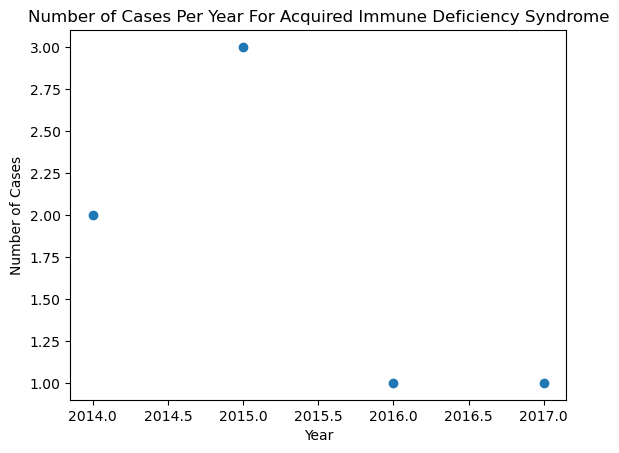

In [9]:
# 8. plot the total number of cases for each year, for the disease indicated in 'diseaseName'
#    Use the matplotlib scatter function (https://matplotlib.org/stable/plot_types/basic/scatter_plot.html)

diseaseName = 'Acquired Immune Deficiency Syndrome'
nsOnly = zoneData[(zoneData['Zone']=='Nova Scotia')]
                  
x = nsOnly[nsOnly['Disease']==diseaseName]['Year'].values
y = nsOnly[(nsOnly['Disease']==diseaseName)]['Number of Cases'].values

# plot

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.title("Number of Cases Per Year For " + diseaseName)
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()

# TODO: your code goes here. Be sure to handle potential errors. 
#       Add appropriate axis labels and title.

### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load          |     | /2      |           |
| 2  | Sort          |     | /5      |           |
| 3  | Duplicates    |     | /3      |           |
| 4  | Missing       |     | /5      |           |
| 5  | Out-of-bounds |     | /2      |           |
| 6  | Intra check   |     | /3      |           |
| 7  | Inter check   |     | /3      |           |
| 8  | Plot          |     | /2      |           |
| -  | TOTAL         |     | /25     |           |


## Section 2 - Data imputation, reduction, and basic analysis

The novel coronavirus disease 2019 ([COVID-19](https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html)) is a contagious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic. 

In this Section, we will use some simple data science techniques to 1) identify similarities between countries, 2) identify covariates that relate to 

### Dataset: Our World in Data COVID 

The data for this section come [Our World in Data](https://ourworldindata.org/coronavirus), i.e., from their GitHub [repository](https://github.com/owid/covid-19-data/tree/master/public/data). More specifically, the that team aggregated data from multiple sources such as [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19), various official national sources, the United Nations, the World Bank, Global Burden of Disease, and others. It is released under the [Creative Commons BY License](https://creativecommons.org/licenses/by/4.0/).

There are 67 features in the dataset, only some of which we will use. For information on these, consult https://github.com/owid/covid-19-data/tree/master/public/data.

### Tasks

Our task is to look for simple patterns in the COVID data. First, we will 'fill in the blanks' in the data through imputation, project the data down into fewer dimensions, perform some simple distribution fitting to the data, compute measures of entropy, and finally look for features that are highly related or informative.

Complete each of the code cells below according to the instructions in the comments.

In [19]:
# 1. Impute mising data
#    - Select only countries with a population >= 30 million
#    - Use the KNNImputer from scikit-learn, with k=3 nearest neighbours, to impute missing
#      numeric data among the selected countries
#    - Your resulting DataFrame should have all text and numeric fields below

# Note: you are encouraged to download this file either from here or from Brightspace directly and to use it locally,
#       as long as your code works for the markers (e.g., do not hardcode local paths in submission).
urlCOVID = 'https://dal.brightspace.com/d2l/le/dropbox/250788/174362/DownloadAttachment?fid=14594172'

text_fields = ['location','date']
numeric_fields = ['new_cases_per_million', 'new_deaths_per_million', 
                  'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 
                  'stringency_index', 'population_density', 'median_age', 
                  'gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
                  'hospital_beds_per_thousand','life_expectancy','human_development_index',
                  'population']

# TODO: your code goes here

covidData = pd.read_csv('owid-covid-data.csv')

covidData = covidData[covidData['population'] > 30000000]

covidData_numeric = covidData[['new_cases_per_million', 'new_deaths_per_million', 
                  'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 
                  'stringency_index', 'population_density', 'median_age', 
                  'gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
                  'hospital_beds_per_thousand','life_expectancy','human_development_index',
                  'population']]


# pd.set_option('display.max_rows', 120)
# covidData.dtypes
covidData.head(10)

imputer = KNNImputer(n_neighbors=3)
covidData_imputed = pd.DataFrame(imputer.fit_transform(covidData_numeric))

covidDataFinal = covidData_numeric.append(covidData[['location','date']], ignore_index=True)

# covidData.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


C:\Users\Tasne\AppData\Local\Temp\ipykernel_14756\83536995.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covidDataFinal = covidData_numeric.append(covidData[['location','date']], ignore_index=True)


In [20]:
# 2. Extract the top 10 principal components

# TODO: your code goes here

pca=PCA(n_components=10)
covidData_reduced=pca.fit_transform(covidData_imputed)
covidData_reduced

array([[-4.71991942e+08, -1.74153736e+04, -4.35296982e+01, ...,
        -2.06556617e+01, -4.79814531e+00,  3.55331616e+00],
       [-4.71991942e+08, -1.74153742e+04, -4.36513833e+01, ...,
        -2.06555955e+01, -4.79788040e+00,  3.55335728e+00],
       [-4.71991942e+08, -1.74153742e+04, -4.36513833e+01, ...,
        -2.06555955e+01, -4.79788040e+00,  3.55335728e+00],
       ...,
       [-4.79424102e+08, -1.77410215e+04, -3.95628055e+01, ...,
         7.93994376e+00,  7.87951651e-02,  2.54269644e+00],
       [-4.79424102e+08, -1.77410215e+04, -3.95628055e+01, ...,
         7.93994376e+00,  7.87951651e-02,  2.54269644e+00],
       [-4.79424102e+08, -1.77410215e+04, -3.95628055e+01, ...,
         7.93994376e+00,  7.87951651e-02,  2.54269644e+00]])

In [21]:
covidData_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.122,0.0,13.043333,11.463333,8.33,54.422,18.6,1803.987,0.1,597.029,0.5,64.83,0.511,41128772.0
1,0.000,0.0,13.043333,11.463333,8.33,54.422,18.6,1803.987,0.1,597.029,0.5,64.83,0.511,41128772.0
2,0.000,0.0,13.043333,11.463333,8.33,54.422,18.6,1803.987,0.1,597.029,0.5,64.83,0.511,41128772.0
3,0.000,0.0,13.043333,11.463333,8.33,54.422,18.6,1803.987,0.1,597.029,0.5,64.83,0.511,41128772.0
4,0.000,0.0,13.043333,11.463333,8.33,54.422,18.6,1803.987,0.1,597.029,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64561,0.000,0.0,1.213333,1.020000,64.81,53.508,20.3,1479.147,18.8,495.003,0.7,66.12,0.470,33696612.0
64562,0.000,0.0,1.213333,1.020000,64.81,53.508,20.3,1479.147,18.8,495.003,0.7,66.12,0.470,33696612.0
64563,0.000,0.0,1.213333,1.020000,64.81,53.508,20.3,1479.147,18.8,495.003,0.7,66.12,0.470,33696612.0
64564,0.000,0.0,1.213333,1.020000,64.81,53.508,20.3,1479.147,18.8,495.003,0.7,66.12,0.470,33696612.0


Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000003,11490.832025,-1.527292e+06,inf,0.402142,0.0
chi2,0.000022,3392.871639,-1.407659e+06,inf,0.527739,0.0
exponpow,0.000027,2194.106222,-1.393433e+06,inf,0.302893,0.0
rayleigh,0.000028,36075.336590,-1.392640e+06,inf,0.356465,0.0
cauchy,0.000031,3104.466392,-1.385878e+06,inf,0.364048,0.0


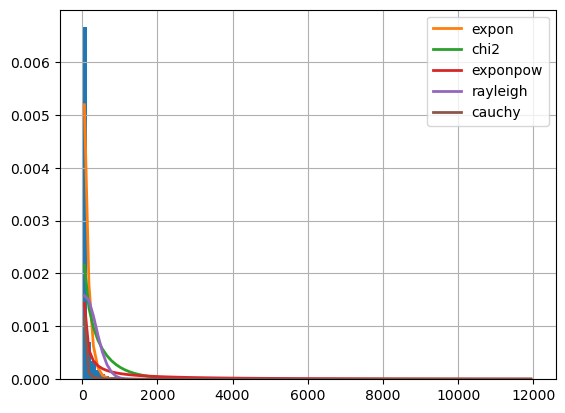

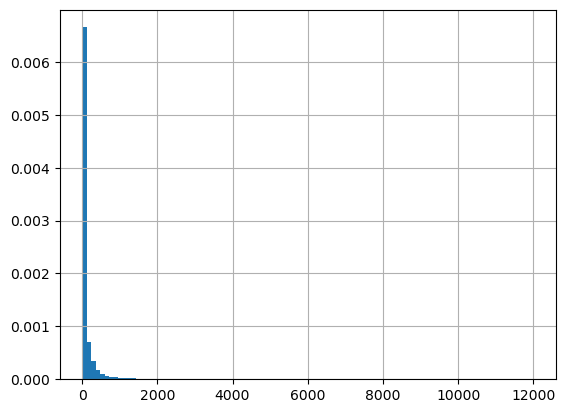

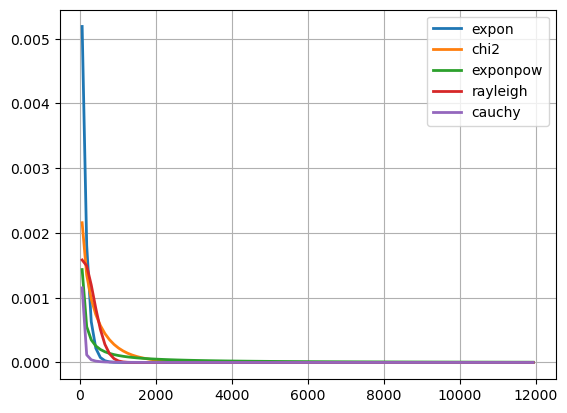

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.58it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.139105,6529.334176,-842432.907687,inf,0.352055,0.0
cauchy,0.220002,1903.192862,-812835.540633,inf,0.362391,0.0
gamma,0.287650,5567.233708,-795513.703270,inf,0.236068,0.0
chi2,0.386321,1935.480232,-776471.638818,inf,0.395718,0.0
exponpow,0.454679,2194.893253,-765952.440968,inf,0.414257,0.0


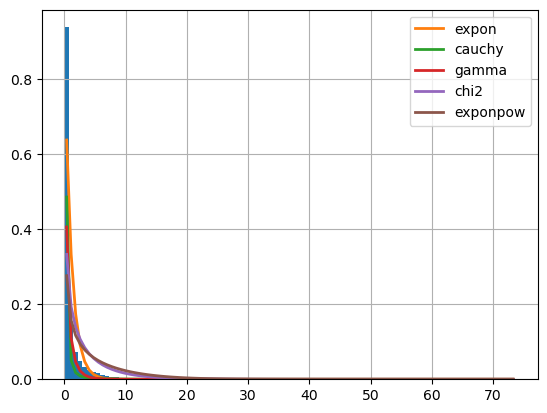

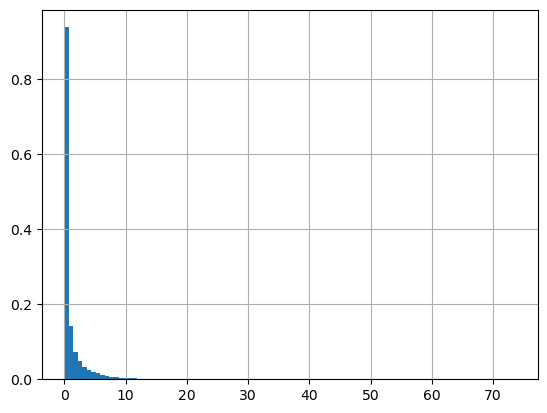

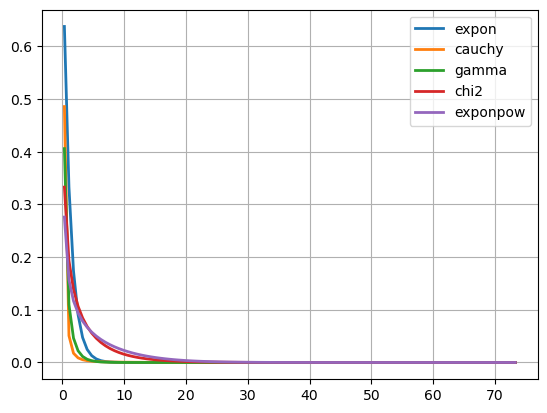

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.006525,1300.208188,-1.039966e+06,0.369142,0.319673,0.0
exponpow,0.011422,972.148679,-1.003819e+06,0.243593,0.157953,0.0
powerlaw,0.012864,922.178696,-9.961419e+05,0.174092,0.137390,0.0
gamma,0.016489,1012.932819,-9.801113e+05,0.390140,0.256237,0.0
expon,0.016899,974.467603,-9.785380e+05,0.314639,0.145942,0.0


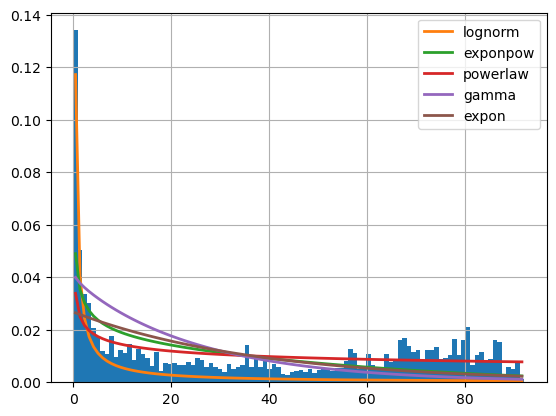

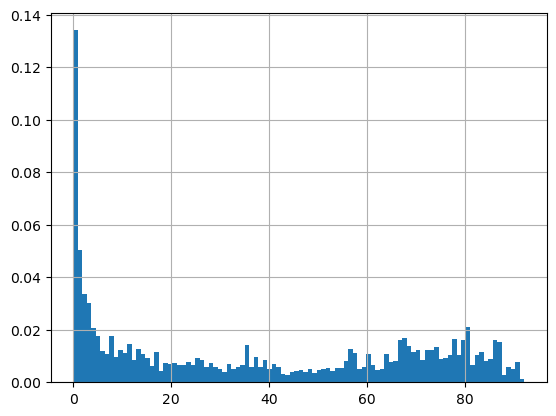

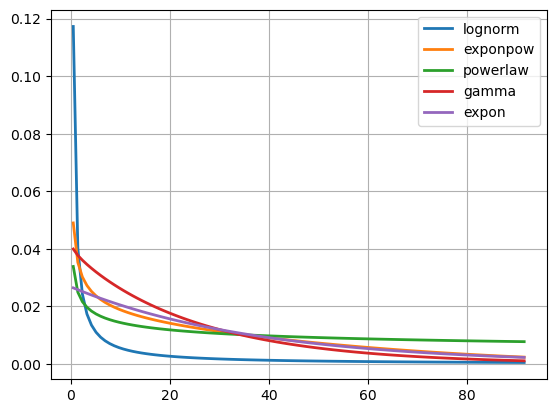

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.014385,1325.354517,-988923.138024,0.294705,0.355235,0.0
exponpow,0.014546,997.730434,-988207.846419,0.205711,0.105139,0.0
powerlaw,0.014949,941.451517,-986439.896023,0.173545,0.092099,0.0
gamma,0.023290,1056.175692,-957814.035645,0.391448,0.261326,0.0
expon,0.029879,976.638714,-941739.591712,0.336313,0.162290,0.0


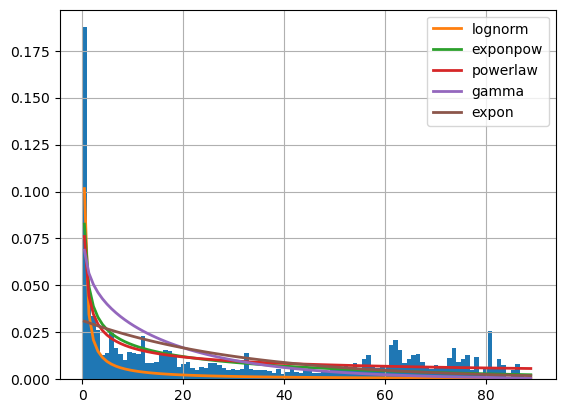

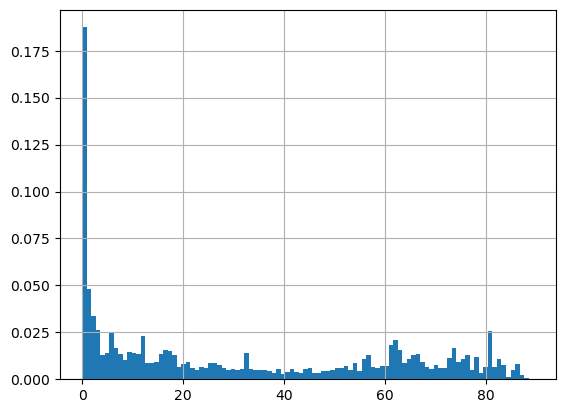

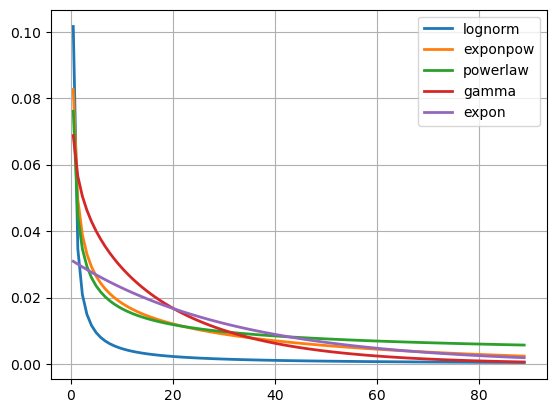

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.004398,975.867217,-1.065448e+06,inf,0.078199,0.0
lognorm,0.004418,977.888252,-1.065145e+06,inf,0.079294,0.0
gamma,0.004492,976.956946,-1.064071e+06,inf,0.080110,0.0
rayleigh,0.005218,inf,-1.054415e+06,inf,0.097079,0.0
cauchy,0.005443,1028.119991,-1.051683e+06,inf,0.114801,0.0


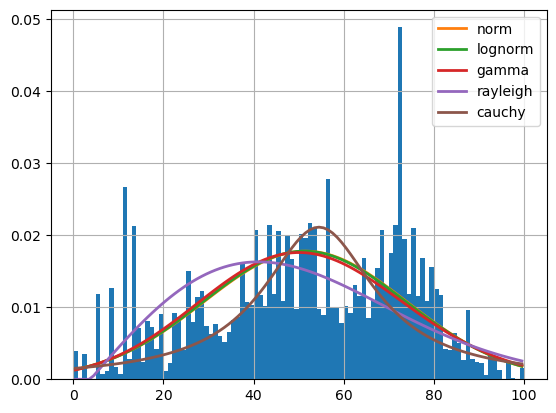

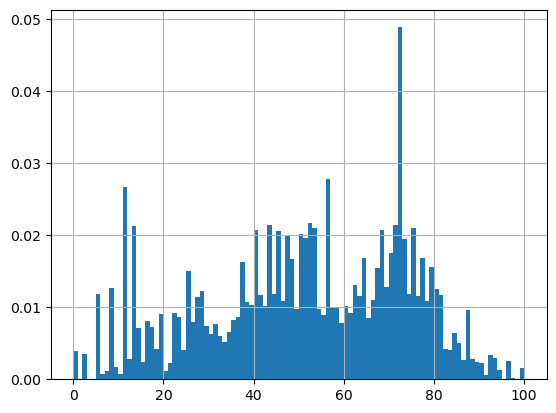

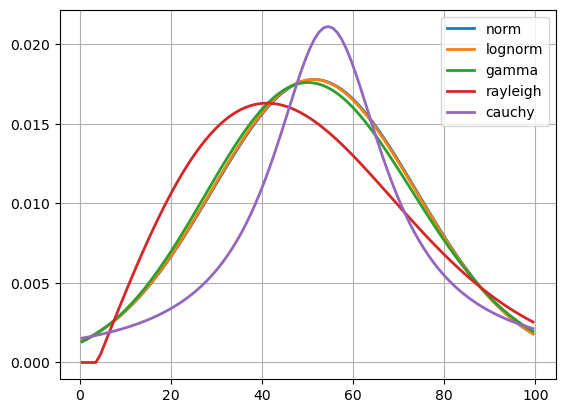

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.74it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000079,1800.510157,-1.325218e+06,inf,0.058603,3.434505e-193
expon,0.000097,1921.368643,-1.311848e+06,inf,0.116412,0.000000e+00
chi2,0.000112,1904.490488,-1.302598e+06,inf,0.112091,0.000000e+00
gamma,0.000112,1895.787585,-1.302215e+06,inf,0.112150,0.000000e+00
exponpow,0.000140,1741.523468,-1.288085e+06,inf,0.204437,0.000000e+00


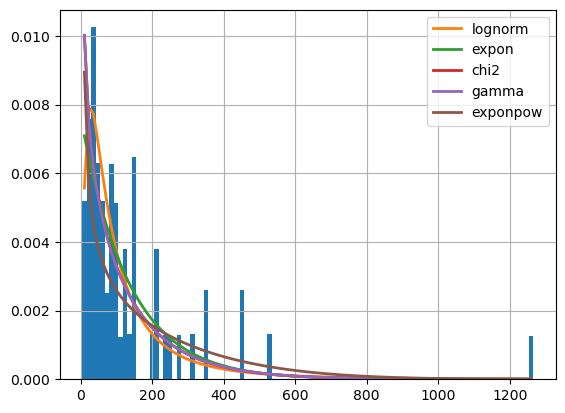

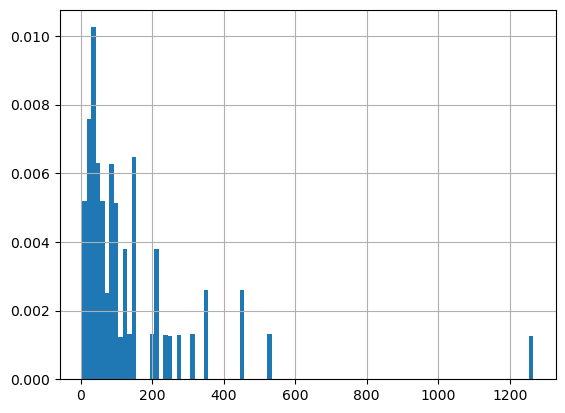

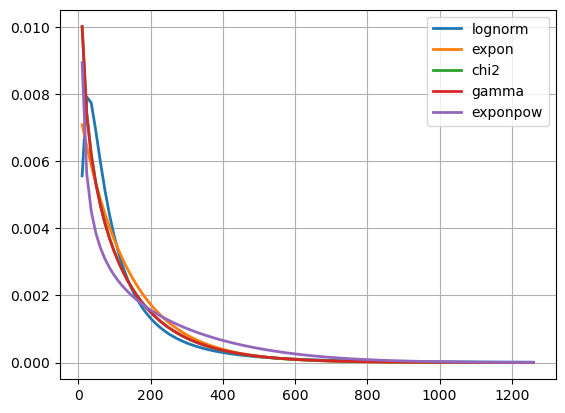

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,0.308827,699.519786,-790927.286526,inf,0.116594,0.0
uniform,0.309121,695.893258,-790876.773453,inf,0.114765,0.0
norm,0.312841,733.030331,-790104.474477,inf,0.148214,0.0
gamma,0.312844,735.024955,-790092.895110,inf,0.148287,0.0
lognorm,0.312964,735.046853,-790067.983533,inf,0.150266,0.0


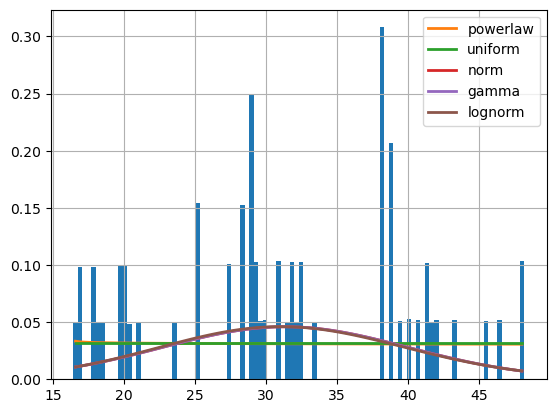

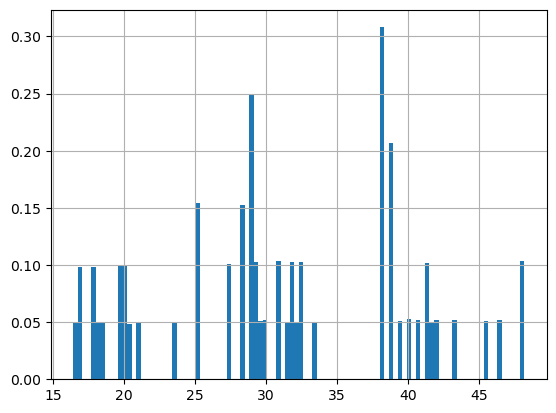

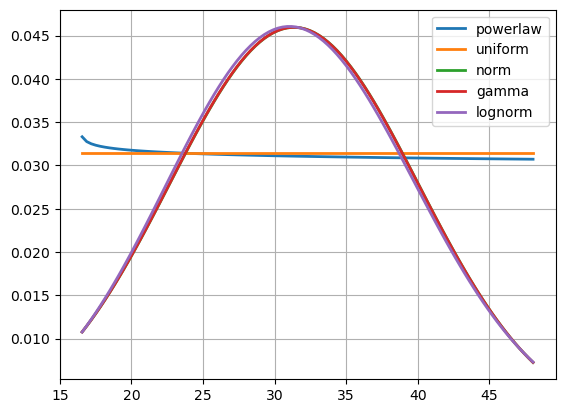

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.136808e-07,2258.663471,-1.747477e+06,inf,0.084091,0.0
gamma,1.136938e-07,2274.921444,-1.747458e+06,inf,0.106436,0.0
exponpow,1.142834e-07,2252.663089,-1.747124e+06,inf,0.079137,0.0
cauchy,1.250407e-07,2353.186576,-1.741327e+06,inf,0.202735,0.0
powerlaw,1.278758e-07,2208.915921,-1.739869e+06,inf,0.247073,0.0


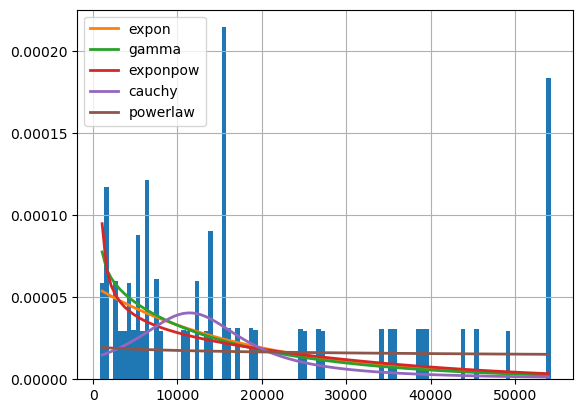

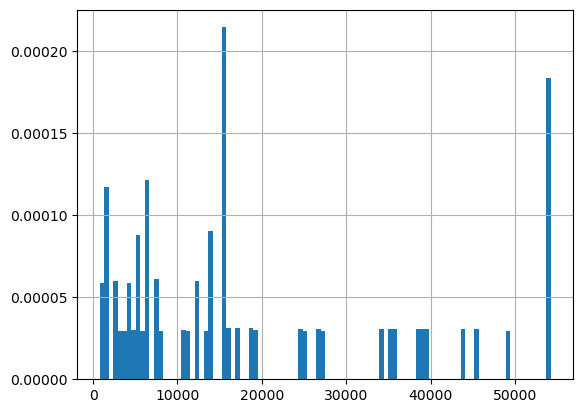

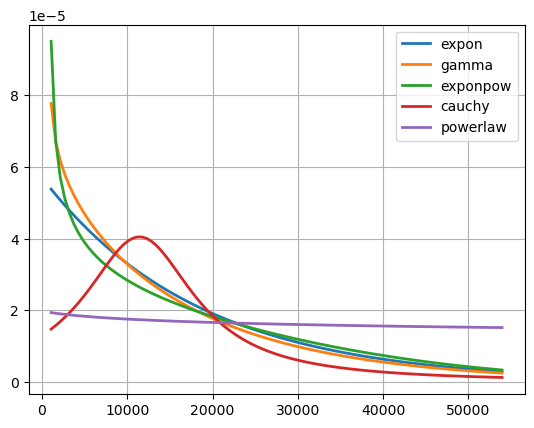

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.070368,1158.446217,-886423.502894,inf,0.143692,0.0
chi2,0.078521,1108.676778,-879344.930747,inf,0.142701,0.0
cauchy,0.079526,1499.453353,-878535.100549,inf,0.309917,0.0
exponpow,0.108276,1029.098654,-858598.845675,inf,0.277473,0.0
powerlaw,0.116076,992.421172,-854107.279082,inf,0.264832,0.0


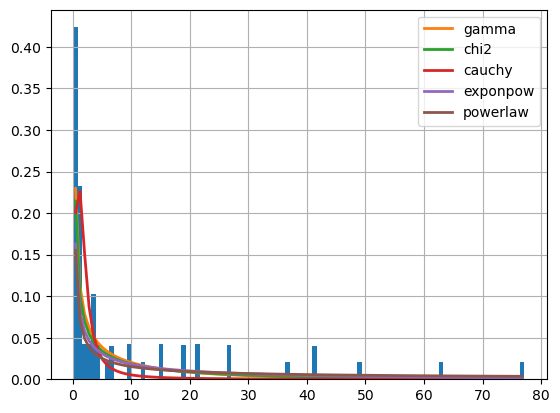

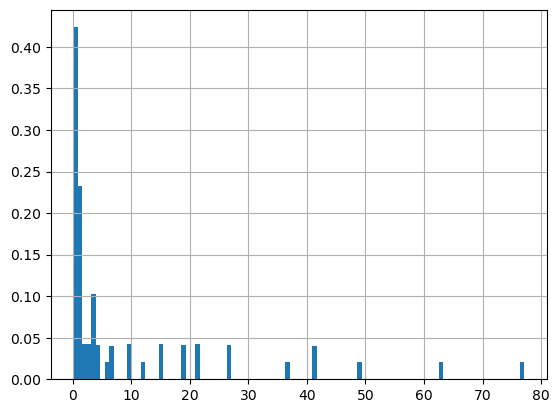

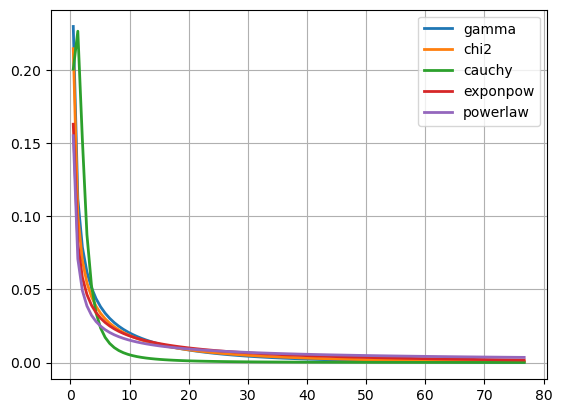

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.93it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000729,1433.776710,-1.181493e+06,inf,0.080267,0.0
gamma,0.000732,1422.482419,-1.181188e+06,inf,0.093317,0.0
chi2,0.000732,1422.482432,-1.181188e+06,inf,0.093318,0.0
exponpow,0.000734,1431.138242,-1.181023e+06,inf,0.125749,0.0
rayleigh,0.000735,1465.280366,-1.180982e+06,inf,0.143411,0.0


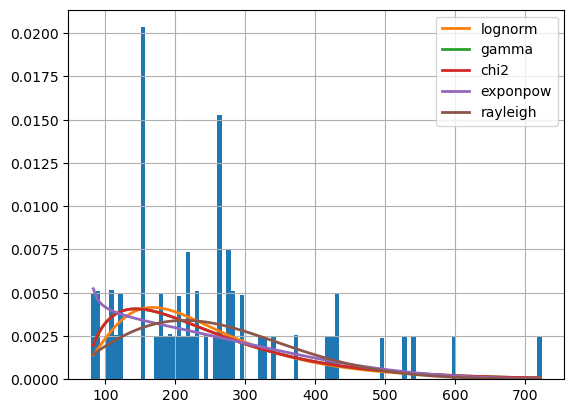

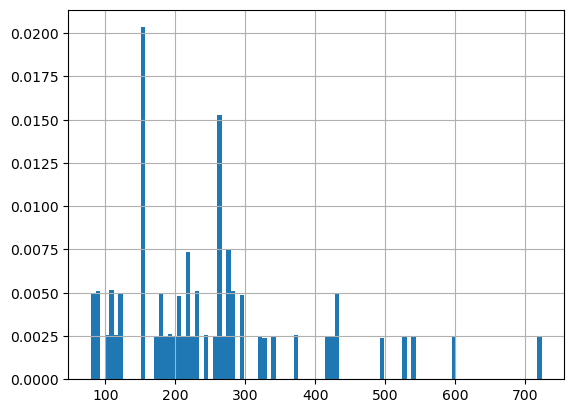

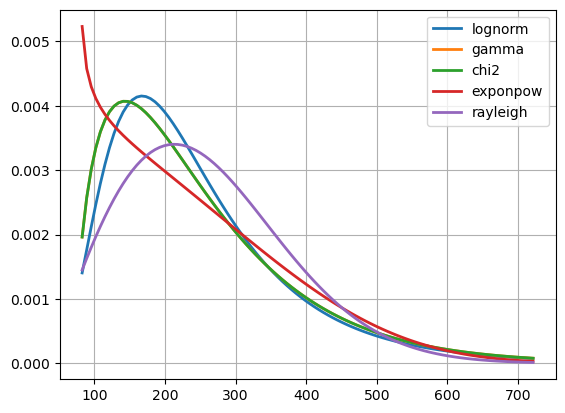

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.76it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,1.831957,694.684067,-675987.653057,inf,0.124729,0.0
lognorm,1.882382,707.507894,-674223.385984,inf,0.098575,0.0
cauchy,2.058544,783.108574,-668458.326310,inf,0.160906,0.0
rayleigh,2.119049,776.619607,-666587.956389,inf,0.263437,0.0
norm,2.266940,794.473015,-662232.100165,inf,0.256917,0.0


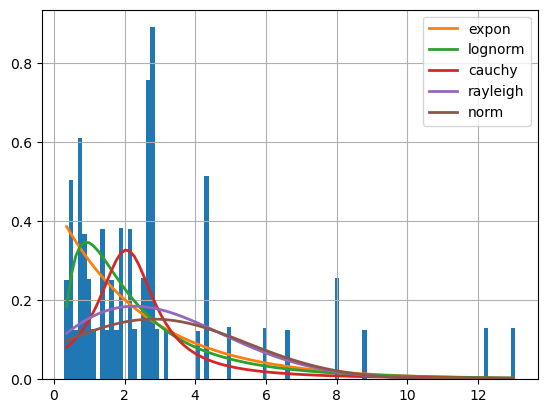

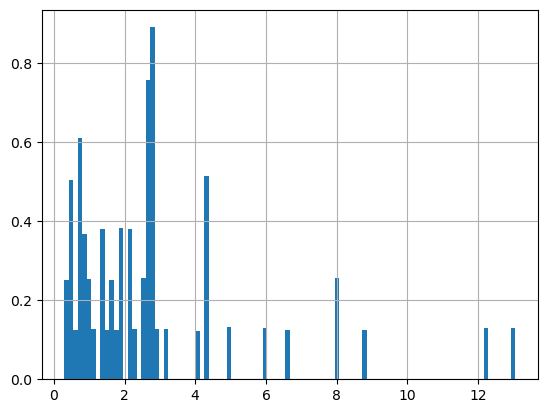

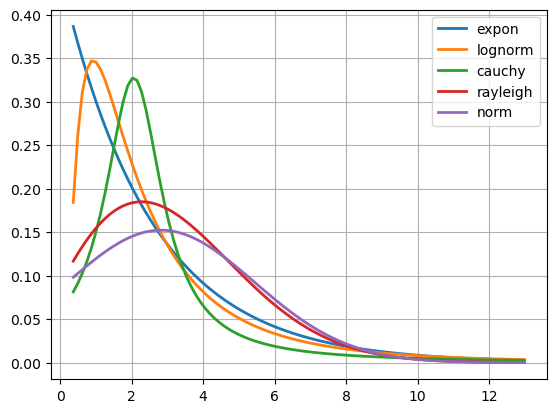

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.388665,769.187797,-776092.194417,inf,0.144114,0.0
lognorm,0.389377,774.737706,-775962.961260,inf,0.146308,0.0
gamma,0.389942,773.148156,-775869.366728,inf,0.144632,0.0
cauchy,0.390628,821.135966,-775766.889939,inf,0.160977,0.0
chi2,0.391004,770.017857,-775693.780996,inf,0.150666,0.0


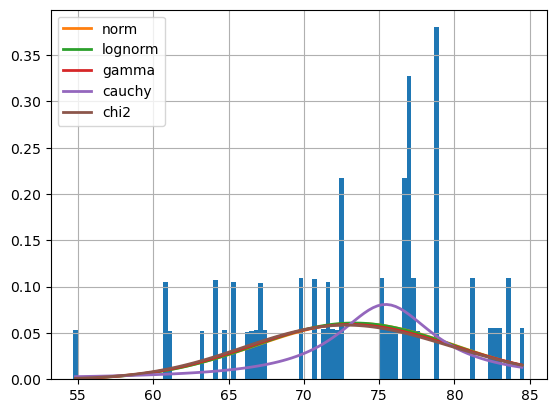

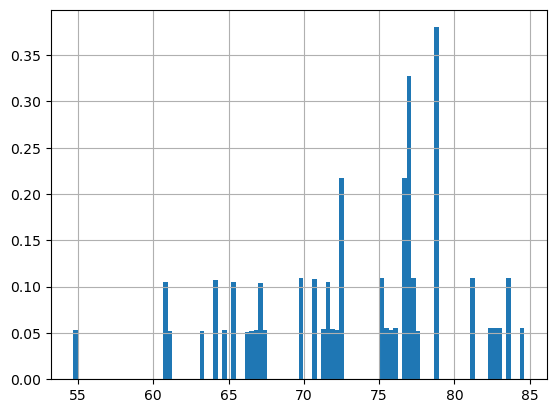

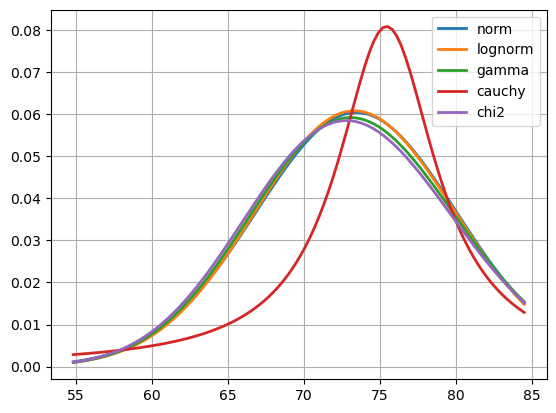

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,1211.048012,-135.930915,-256694.222061,inf,0.156172,0.0
uniform,1217.244343,-138.262230,-256375.787624,inf,0.172486,0.0
exponpow,1243.378965,-106.881033,-254993.131670,inf,0.099080,0.0
norm,1253.412616,-96.685358,-254485.272179,inf,0.092554,0.0
lognorm,1254.339283,-94.683939,-254426.479731,inf,0.093241,0.0


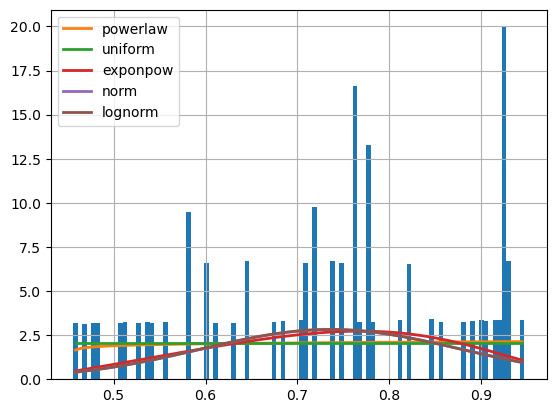

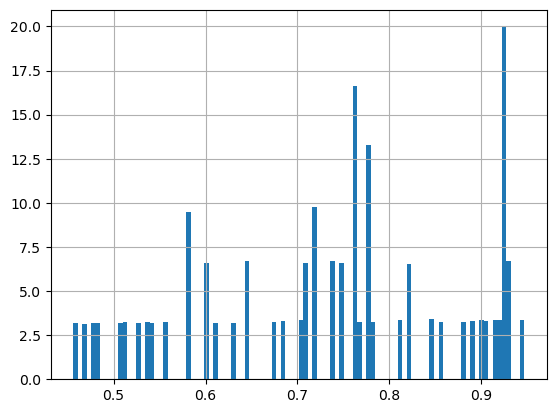

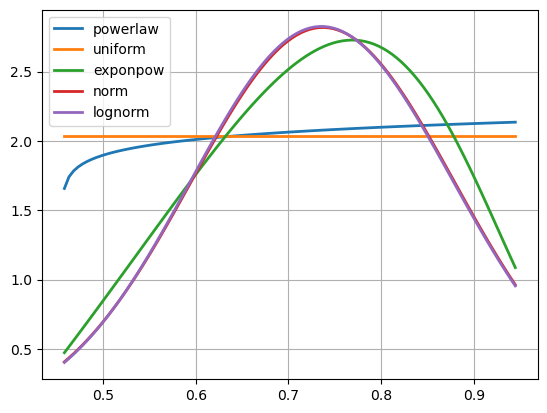

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,1.392207e-18,5482.350222,-3.369747e+06,inf,0.296739,0.0
lognorm,9.028325e-18,5062.624857,-3.249032e+06,inf,0.075663,0.0
chi2,2.914271e-17,4833.597257,-3.173371e+06,inf,0.259139,0.0
exponpow,3.147889e-17,4782.722504,-3.168392e+06,inf,0.313343,0.0
gamma,3.274633e-17,4763.758738,-3.165843e+06,inf,0.401737,0.0


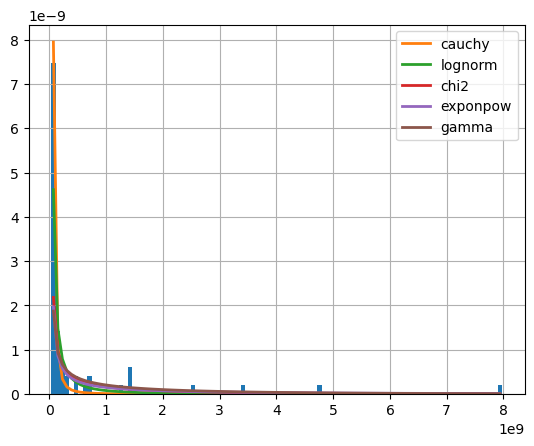

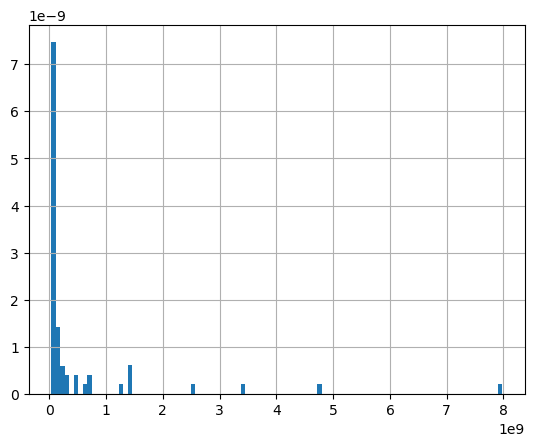

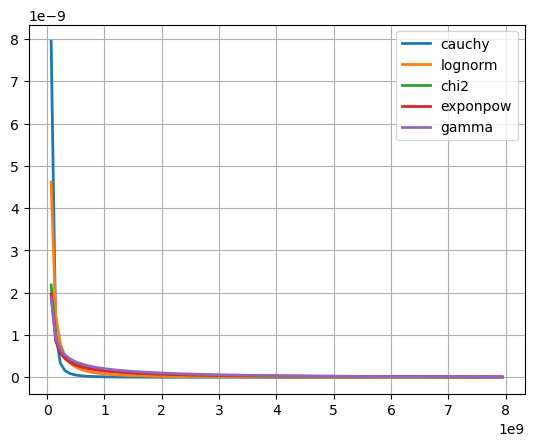

In [22]:
# 3. For each numeric field separately, using the imputed data:
#        a) identify best distributions using the Fitter library 
#           (https://pypi.org/project/fitter/) 
#           Only consider the subset in common_distributions
#        b) print the summary for each fit using the built in fitter summary() function
#        c) plot the data using the Fitter.hist() function
#        d) plot the density function using the Fitter.plot_pdf() function

common_distributions = get_common_distributions()
# TODO: your code goes here

#{'expon': {'loc': 0.0, 'scale': 113.76538939999382}}
best_fit=[]

for index in range(len(covidData_imputed.axes[1])):
    f = Fitter(covidData_imputed[index], distributions=common_distributions)
    f.fit()
    best_fit.append(f.get_best())
    f.summary()
    plt.show()
    f.hist()
    plt.show()
    f.plot_pdf()
    plt.show()
    

In [44]:
# 4. For each numeric field separately, using the imputed data:
#        a) Using the best distribution from the previous cell, _and all of its parameters_,
#           print the results of the associated entropy() method in scipy.stats
#           e.g., if the best distribution found is chi2, call
#                 scipy.stats.chi2.entropy( mydf, loc=myloc, scale=myscale ) for 
#                 computed values of mydf, myloc, and myscale
#        b) bin the data for that field once into 100 equal-width bins and
#           once into 100 equal-frequency bins. Store the proportional frequency of
#           each bin, relative to the total number of samples, in p_equalWidth and 
#           p_equalFreq, below
#        c) compute and print the Shannon entropy on each of p_equalWidth and p_equalFreq using
#           https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
#
#    In the Markdown cell below, describe in your own words what differences you observe
#    in the results between the distribution-based and the two Shannon-based entropy methods.
#    Which numeric field is the most informative? Which is the least informative?

# TODO: your code goes here

#    discretize data in two methods - equal probability vs equal size.
#    compute entropy.

entropy = []

p_equalWidth = np.zeros(100)
p_equalFreq  = np.zeros(100)

print(best_fit)
entropy.append(scipy.stats.expon.entropy(loc=best_fit[0]['expon']['loc'], scale=best_fit[0]['expon']['scale']))
entropy.append(scipy.stats.expon.entropy(loc=best_fit[1]['expon']['loc'], scale=best_fit[1]['expon']['scale']))
entropy.append(scipy.stats.lognorm.entropy(s=best_fit[2]['lognorm']['s'], loc=best_fit[2]['lognorm']['loc'], scale=best_fit[2]['lognorm']['scale']))
entropy.append(scipy.stats.lognorm.entropy(s=best_fit[3]['lognorm']['s'], loc=best_fit[3]['lognorm']['loc'], scale=best_fit[3]['lognorm']['scale']))
entropy.append(scipy.stats.norm.entropy(loc=best_fit[4]['norm']['loc'], scale=best_fit[4]['norm']['scale']))

entropy.append(scipy.stats.lognorm.entropy(s=best_fit[5]['lognorm']['s'], loc=best_fit[5]['lognorm']['loc'], scale=best_fit[5]['lognorm']['scale']))
entropy.append(scipy.stats.powerlaw.entropy(a=best_fit[6]['powerlaw']['a'], loc=best_fit[6]['powerlaw']['loc'], scale=best_fit[6]['powerlaw']['scale']))
entropy.append(scipy.stats.expon.entropy(loc=best_fit[7]['expon']['loc'], scale=best_fit[7]['expon']['scale']))
entropy.append(scipy.stats.gamma.entropy(a=best_fit[8]['gamma']['a'], loc=best_fit[8]['gamma']['loc'], scale=best_fit[8]['gamma']['scale']))
entropy.append(scipy.stats.lognorm.entropy(s=best_fit[9]['lognorm']['s'], loc=best_fit[9]['lognorm']['loc'], scale=best_fit[9]['lognorm']['scale']))

entropy.append(scipy.stats.expon.entropy(loc=best_fit[10]['expon']['loc'], scale=best_fit[10]['expon']['scale']))
entropy.append(scipy.stats.norm.entropy(loc=best_fit[11]['norm']['loc'], scale=best_fit[11]['norm']['scale']))
entropy.append(scipy.stats.powerlaw.entropy(a=best_fit[12]['powerlaw']['a'], loc=best_fit[12]['powerlaw']['loc'], scale=best_fit[12]['powerlaw']['scale']))
entropy.append(scipy.stats.cauchy.entropy(loc=best_fit[13]['cauchy']['loc'], scale=best_fit[13]['cauchy']['scale']))


print(entropy)


# TODO: your code goes here

[{'expon': {'loc': 0.0, 'scale': 113.76538939999382}}, {'expon': {'loc': 0.0, 'scale': 1.1327288562607771}}, {'lognorm': {'s': 7.1211690618767935, 'loc': -4.6190791441842116e-21, 'scale': 3.264369054749597}}, {'lognorm': {'s': 8.522061509730719, 'loc': -3.1062897867303775e-25, 'scale': 3.7502378571392168}}, {'norm': {'loc': 51.46890050490971, 'scale': 22.438627587091943}}, {'lognorm': {'s': 1.0332408007342533, 'loc': -1.3891459142816527, 'scale': 82.272806838643}}, {'powerlaw': {'a': 0.984691586215789, 'loc': 16.399999999999995, 'scale': 32.058146289197076}}, {'expon': {'loc': 808.133, 'scale': 18333.117896524484}}, {'gamma': {'a': 0.3758720880592318, 'loc': 0.09999999999999999, 'scale': 23.7352384028328}}, {'lognorm': {'s': 0.5359569574327003, 'loc': 12.071270146610154, 'scale': 206.94450203800392}}, {'expon': {'loc': 0.3, 'scale': 2.520989684973516}}, {'norm': {'loc': 73.43862961930427, 'scale': 6.6083466081012245}}, {'powerlaw': {'a': 1.0493946347514767, 'loc': 0.45556774388547616, 

**TODO**: Enter your discussion for task 4 of Section 2 here, in no more than 10 sentences.

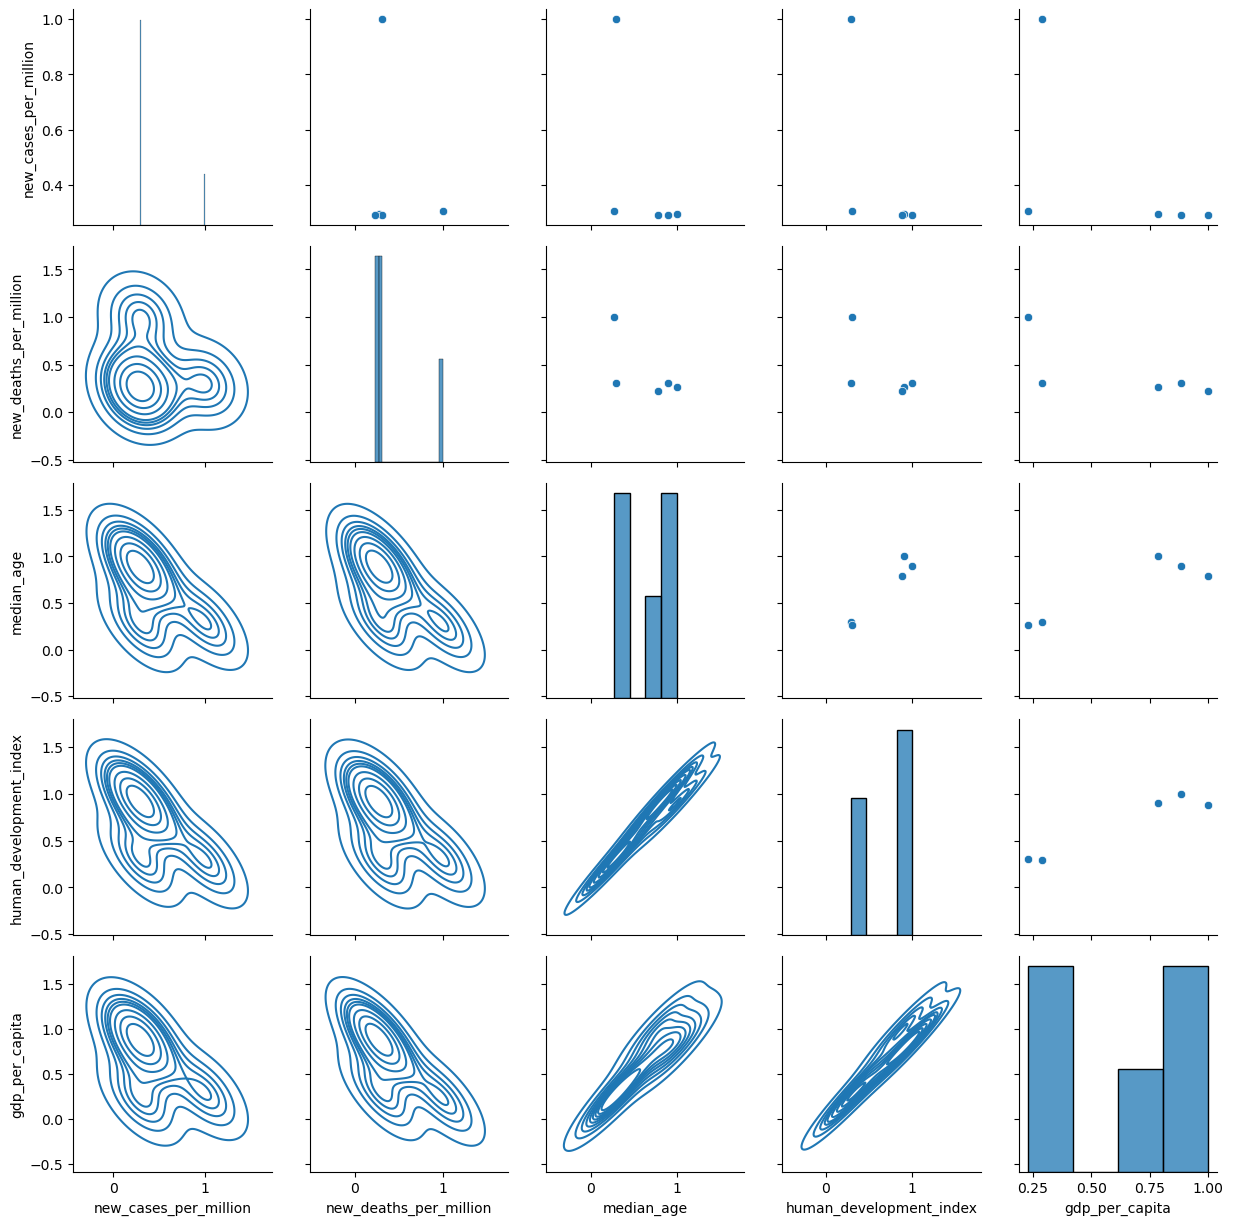

In [40]:
# 5. Identify variables that relate to important COVID outcomes
#    For each of 'new_cases_per_million' and 'new_deaths_per_million', compute Pearson
#    correlation (using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
#    with that field and all other numeric fields
#
#        For the 4 features most correlated with the outcome of interest, plot a 5x5 
#        SeaBorn PairGrid (https://seaborn.pydata.org/generated/seaborn.PairGrid.html) with
#        scatter in the upper matrix, histograms on the diagonal, and kde plots on the 
#        lower matrix, as in:
#
#               g = sns.PairGrid(penguins, diag_sharey=False)
#               g.map_upper(sns.scatterplot)
#               g.map_lower(sns.kdeplot)
#               g.map_diag(sns.histplot)
#
#    In the Markdown cell below, list the features that are most correlated with 
#    'new_cases_per_million' and 'new_deaths_per_million'. Are these the same that 
#    were 'informative' in task 4 of Section 2? Why or why not?
#
# TODO: your code goes here


ncase_key = covidDataFinal.corr(method='pearson')['new_cases_per_million'].sort_values(ascending=False)[:5].keys().values.tolist()
ncase_df = covidDataFinal[ncase_key].corr(method='pearson')

g = sns.PairGrid(df1, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)


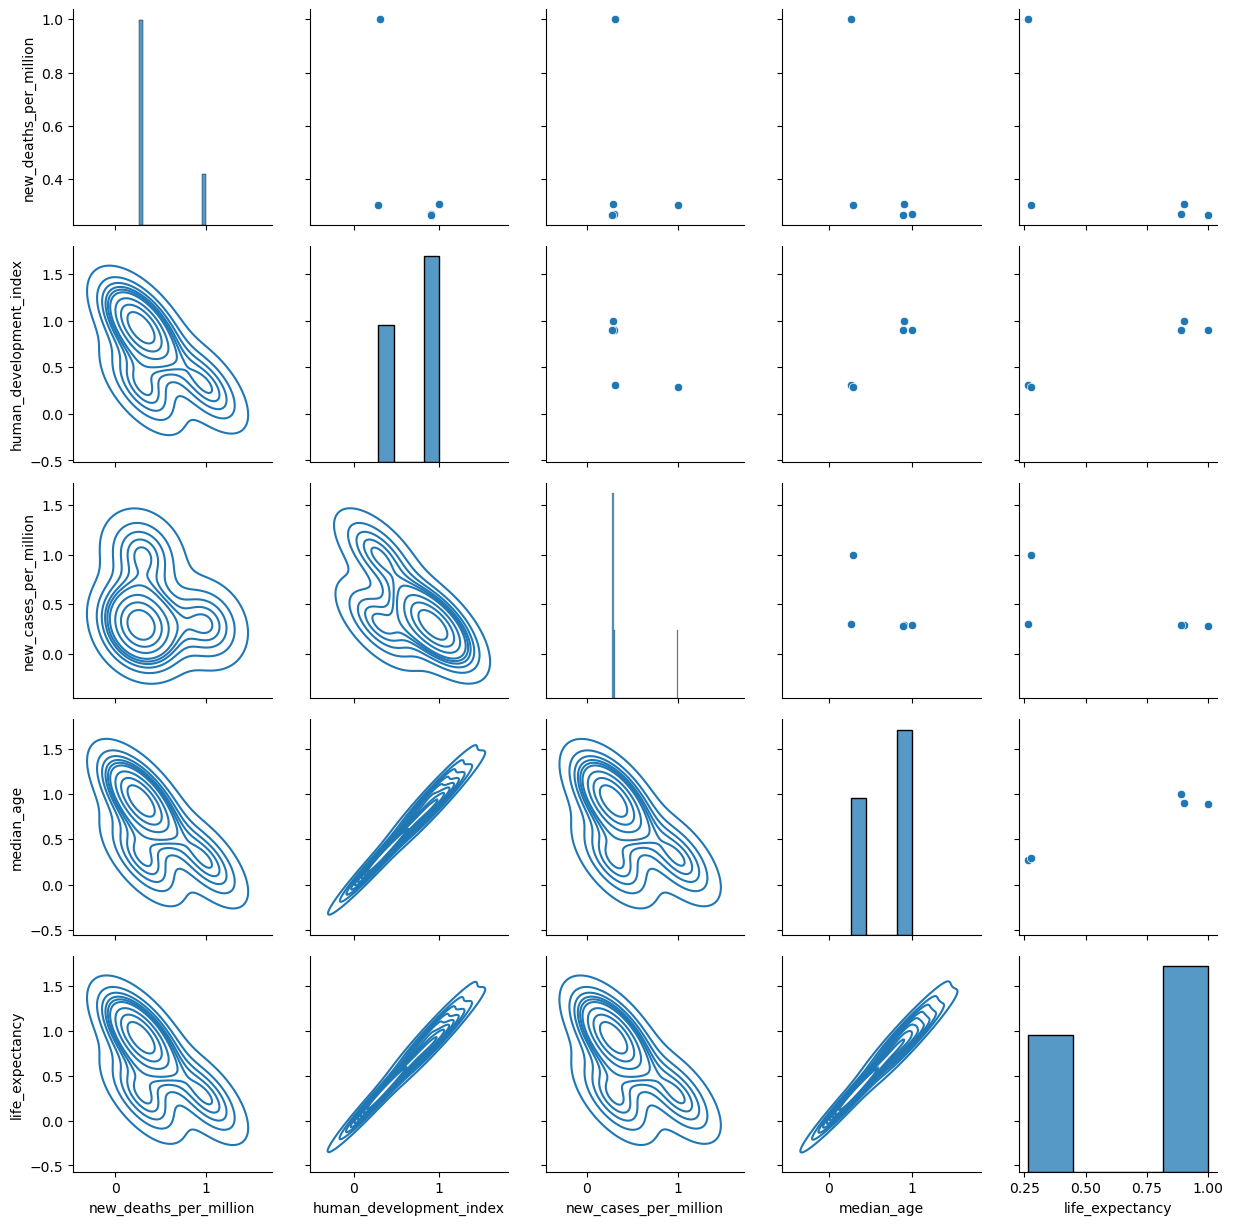

In [41]:
death_key = covidDataFinal.corr(method='pearson')['new_deaths_per_million'].sort_values(ascending=False)[:5].keys().values.tolist()
death_df = covidDataFinal[keys_new_deaths].corr(method='pearson')

g = sns.PairGrid(death_df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)


**TODO**: Enter your discussion for task 5 of Section 2 here, in no more than 5 sentences.

ANS: 

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Impute        |     | /4      |           |
| 2  | PCA           |     | /1      |           |
| 3  | Fit           |     | /4      |           |
| 4  | Entropy       |     | /8      |           |  
| 5  | Correlations  |     | /5      |           |
| -  | TOTAL         |     | /22     |           |

## Bonus [5 Marks]

- We will give up to 5 bonus marks for innovative work going substantially beyond the minimal requirements. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

1. **Outlier corruptions**. Introduce some outliers to the data in Section 1, and write a program that can identify and potentially remove those outliers. Experiment with different methods of ourlier detection, compare them, and report your results.
2. **Spelling correction**. Correct the spelling errors in Section 1, or at least identify which text fields have errors in them. 
3. **Imputation**. Perform imputation for the missing Nova Scotia data in Section 1.
4. **Better correlations**. Are there better ways of assessing correlation between variables across time series, in Section 2?
5. **Differential entropy**. Consider reading scientific articles on differential entropy, using the method from scipy.stats.differential_entropy, and comparing against the results you obtained in Section 2. How do you expect the results to differ? How are the results different?
6. **Analysis of principal components**. Repeat some of the analysis you did with the original features (e.g., entropy) but with the principal components you extracted. What do you observe across the principal components? How are the results different than with the original features?
7. **General improvements**. Are there any approaches prescribed in this assignment that would have been more appropriate or meaningful?


In [ ]:
# BONUS Section

# TODO YOUR CODE GOES HERE

**TODO**: Any discussion for the Bonus section goes here. Feel free to add additional cells below this one, and before the assessment cell. 

### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /5      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

